<div class="alert alert-block alert-info">
__Name__: pangenome_presence_absence_showdown<br/>
__Description__: Compute a series of linear and neighbour classifier performance using pangenome region (presence/absence) for PATRIC AMR data.<br/>
__Author__: Matthew Whiteside matthew dot whiteside at canada dot ca<br/>
__Date__: Sept 28, 2007<br/>
__TODO__:<br/>
</div>

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import os
import re

In [2]:
os.chdir('../pangenome')

In [3]:
import config
import utils

In [4]:
%load_ext autoreload
%autoreload 2

In [152]:
# Load pangenome data
pg, genome_list, locus_list = utils.read_panseq(config.PANSEQ['pangenome_file'])

In [153]:
pg.shape

(342, 6841)

In [154]:
genome_list

Index(['595_dot_68', '85569_dot_10', '85569_dot_100', '85569_dot_101',
       '85569_dot_102', '85569_dot_105', '85569_dot_106', '85569_dot_107',
       '85569_dot_108', '85569_dot_109',
       ...
       '85569_dot_90', '85569_dot_91', '85569_dot_92', '85569_dot_93',
       '85569_dot_94', '85569_dot_95', '85569_dot_96', '85569_dot_97',
       '85569_dot_98', '85569_dot_99'],
      dtype='object', length=342)

In [155]:
# Load AMR data
amr,amr_list = utils.read_amr(config.PHENOTYPE['amr_file'], genome_list)

In [156]:
amr[1,]

array([  1.,   1.,  nan,  nan,   0.,  nan,   1.,   1.,   1.,   0.])

In [157]:
genome_list[1]


'85569_dot_10'

In [158]:
amr_list

Index(['ampicillin', 'chloramphenicol', 'gentamicin', 'kanamycin',
       'nalidixic acid', 'spectinomycin', 'streptomycin', 'sulphonamides',
       'tetracycline', 'trimethoprim'],
      dtype='object')

In [159]:
# Data Loaded

In [160]:
# Split training and test sets

In [161]:
amr.shape

(342, 10)

In [162]:
pg.shape

(342, 6841)

In [190]:
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

In [191]:
logger = logging.getLogger()

In [ ]:
import classify
opts = classify.AttrDict({
    'info_top10': False,
    'info_report': False,
    'info_cm': False
})
results = classify.run(pg, amr, logger, locus_list, ['Susceptible','Resistant'], amr_list, opts)
    

2017-10-03 15:40:40,878 INFO ________________________________________________________________________________
2017-10-03 15:40:40,880 INFO Training: 
2017-10-03 15:40:40,881 INFO RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='sag',
        tol=0.01)
2017-10-03 15:40:41,557 INFO train time: 0.675s
2017-10-03 15:40:41,560 INFO test time:  0.001s
2017-10-03 15:40:41,561 INFO accuracy:   0.899
2017-10-03 15:40:41,561 INFO dimensionality: 6841
2017-10-03 15:40:41,562 INFO density: 0.939629
2017-10-03 15:40:41,563 INFO 

2017-10-03 15:40:41,564 INFO 

2017-10-03 15:40:41,565 INFO ================================================================================
2017-10-03 15:40:41,566 INFO ________________________________________________________________________________
2017-10-03 15:40:41,567 INFO Training: 
2017-10-03 15:40:41,568 INFO Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_in

In [254]:
results

{'ampicillin': {'BernoulliNB': {'score': [0.86956521739130432,
    0.86956521739130432,
    0.92753623188405798,
    0.82608695652173914,
    0.84057971014492749,
    0.81159420289855078,
    0.91304347826086951,
    0.84057971014492749,
    0.81159420289855078,
    0.89855072463768115],
   'test_time': [0.004952192306518555,
    0.004788398742675781,
    0.0048065185546875,
    0.0046880245208740234,
    0.004700422286987305,
    0.004922389984130859,
    0.004660367965698242,
    0.004770040512084961,
    0.004853010177612305,
    0.0047228336334228516],
   'train_time': [0.015868186950683594,
    0.016458749771118164,
    0.01684093475341797,
    0.01612710952758789,
    0.01743316650390625,
    0.016043663024902344,
    0.015984296798706055,
    0.016060352325439453,
    0.016418933868408203,
    0.015562057495117188]},
  'KNeighborsClassifier': {'score': [0.89855072463768115,
    0.82608695652173914,
    0.89855072463768115,
    0.86956521739130432,
    0.85507246376811596,
    0.

In [275]:
results2 = classify.run(pg, amr, logger, locus_list, ['Susceptible','Resistant'], amr_list, opts)

2017-10-04 14:14:29,603 INFO ________________________________________________________________________________
2017-10-04 14:14:29,604 INFO Training: 
2017-10-04 14:14:29,605 INFO RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='sag',
        tol=0.01)
2017-10-04 14:14:30,270 INFO train time: 0.664s
2017-10-04 14:14:30,273 INFO test time:  0.001s
2017-10-04 14:14:30,274 INFO accuracy:   0.870
2017-10-04 14:14:30,275 INFO dimensionality: 6841
2017-10-04 14:14:30,276 INFO density: 0.970765
2017-10-04 14:14:30,277 INFO 

2017-10-04 14:14:30,278 INFO 

2017-10-04 14:14:30,280 INFO ================================================================================
2017-10-04 14:14:30,281 INFO ________________________________________________________________________________
2017-10-04 14:14:30,282 INFO Training: 
2017-10-04 14:14:30,283 INFO Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_in

2017-10-04 13:49:59,092 INFO Accuracy Summary Report: 
2017-10-04 13:49:59,174 INFO ________________________________________________________________________________
2017-10-04 13:49:59,175 INFO RidgeClassifier Values
ampicillin: 0.887, chloramphenicol: 0.9217, gentamicin: 0.9704, kanamycin: 0.9222, nalidixic acid: 0.8957, spectinomycin: 0.8897, streptomycin: 0.9159, sulphonamides: 0.929, tetracycline: 0.9145, trimethoprim: 0.9
2017-10-04 13:49:59,176 INFO ================================================================================
2017-10-04 13:49:59,196 INFO ________________________________________________________________________________
2017-10-04 13:49:59,197 INFO Perceptron Values
ampicillin: 0.7826, chloramphenicol: 0.8638, gentamicin: 0.9574, kanamycin: 0.8796, nalidixic acid: 0.842, spectinomycin: 0.75, streptomycin: 0.8884, sulphonamides: 0.8884, tetracycline: 0.758, trimethoprim: 0.8609
2017-10-04 13:49:59,198 INFO ==========================================================

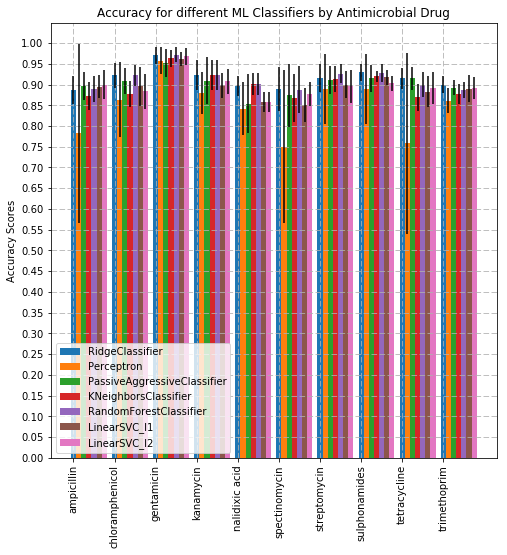

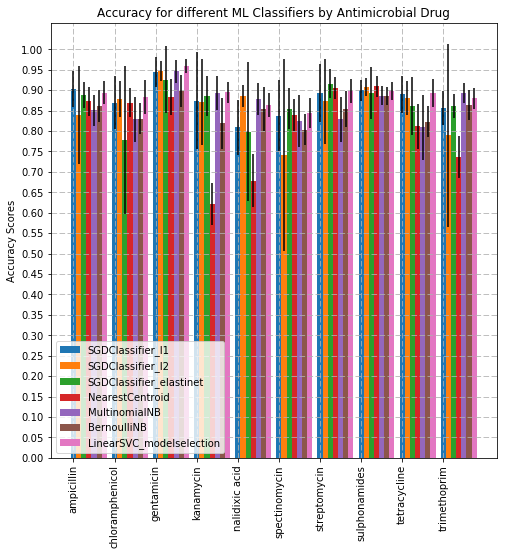

In [270]:
import matplotlib as plt
plt.rcParams['figure.figsize'] = (8,8)
classify.summaryplot(results, logger)

2017-10-04 14:13:39,063 INFO Accuracy Summary Report: 
2017-10-04 14:13:39,151 INFO ________________________________________________________________________________
2017-10-04 14:13:39,152 INFO RidgeClassifier Values
ampicillin: 0.8757, chloramphenicol: 0.9136, gentamicin: 0.9667, kanamycin: 0.9222, nalidixic acid: 0.8922, spectinomycin: 0.8897, streptomycin: 0.9078, sulphonamides: 0.9282, tetracycline: 0.9058, trimethoprim: 0.8981
2017-10-04 14:13:39,153 INFO ================================================================================
2017-10-04 14:13:39,172 INFO ________________________________________________________________________________
2017-10-04 14:13:39,173 INFO Perceptron Values
ampicillin: 0.8194, chloramphenicol: 0.866, gentamicin: 0.9481, kanamycin: 0.8988, nalidixic acid: 0.8621, spectinomycin: 0.8276, streptomycin: 0.8864, sulphonamides: 0.9165, tetracycline: 0.867, trimethoprim: 0.8417
2017-10-04 14:13:39,174 INFO ===================================================

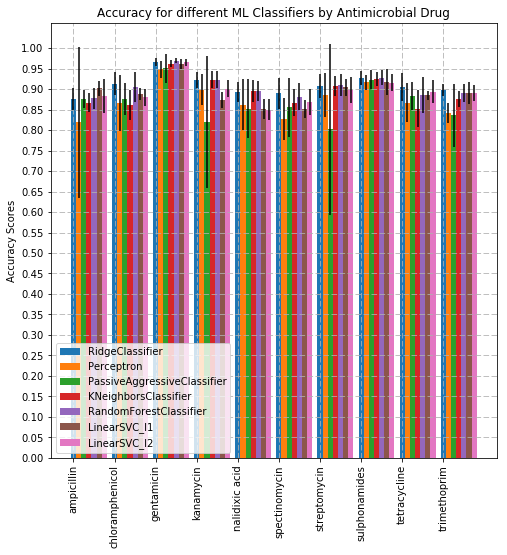

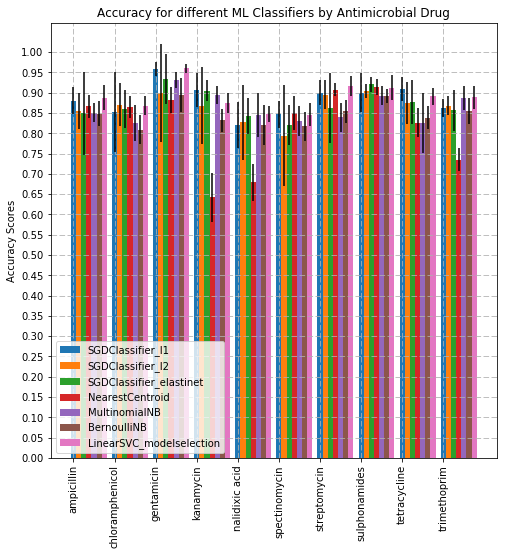

In [274]:
classify.summaryplot(results2, logger)